#  1-1 Please build a gradient descent algorithm based on the following formulas
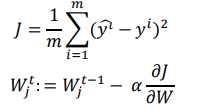

# Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
# Please fit the data using the Linear regression model with the optimum Weight.

# Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂ should be original scale instead of normalized scale.

# Importing Libraies and loading csv dataset

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [254]:
house = pd.read_csv('housing (1).csv')

## Converting Categorical Columns to Binary format

In [255]:
binary_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
house[binary_columns] = house[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)



<ipython-input-255-048171c3f246>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  house[binary_columns] = house[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)


In [256]:
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Normalizing Features

**Using Min-Max Scaling**

* It ensures all features are within a uniform range [0, 1], which stabilizes gradient descent.
* It avoids issues with outliers and skewed distributions.
* It is simple and effective for regression tasks where the relationship between features and the target variable is linear.

In [257]:
# Columns to normalize
columns_to_normalize = ['lotsize','bedrooms','bathrms','stories','garagepl']

# Applying min-max normalization
house[columns_to_normalize] = (house[columns_to_normalize] - house[columns_to_normalize].min()) / (house[columns_to_normalize].max() - house[columns_to_normalize].min())

# Display the first few rows to confirm normalization
house[columns_to_normalize].head()


,lotsize,bedrooms,bathrms,stories,garagepl
0,0.288660,0.4,0.0,0.333333,0.333333
1,0.161512,0.2,0.0,0.000000,0.000000
2,0.096907,0.4,0.0,0.000000,0.000000
3,0.343643,0.4,0.0,0.333333,0.000000
4,0.323711,0.2,0.0,0.000000,0.000000


# Preparing Data for Linear Regression

In [258]:
X = np.c_[np.ones(house.shape[0]), house[['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']].values]
y = house['price'].values.reshape(-1, 1)

# Preparing data in original scale for plotting

In [259]:
X_original = house[['lotsize']].values  # Only 'lotsize' for simple visualization
y_original = house['price'].values.reshape(-1, 1)

# Setting up Hyperparameters

In [260]:
# Hyperparameters
alpha = 0.1  # Learning rate
epochs = 10   # Number of epochs
m = y.size    # Number of samples


# Initialize weights

In [261]:
weights = np.random.rand(X.shape[1], 1)

# Gradient Descent

In [262]:
# Gradient Descent
for epoch in range(epochs):
    # Prediction
    y_pred = X.dot(weights)

    # Calculate RMSE
    rmse = np.sqrt(((y_pred - y) ** 2).mean())
    print(f"Epoch {epoch + 1}: RMSE = {rmse}")

    # Update weights
    gradients = (1/m) * X.T.dot(y_pred - y)
    weights -= alpha * gradients

Epoch 1: RMSE = 73158.09616904856
Epoch 2: RMSE = 56320.88825958515
Epoch 3: RMSE = 44166.149485754126
Epoch 4: RMSE = 35578.77692938451
Epoch 5: RMSE = 29688.558193884135
Epoch 6: RMSE = 25789.783733338332
Epoch 7: RMSE = 23301.36627498723
Epoch 8: RMSE = 21760.346472454334
Epoch 9: RMSE = 20823.220071947304
Epoch 10: RMSE = 20254.838860178814


# Evaluation and Plotting

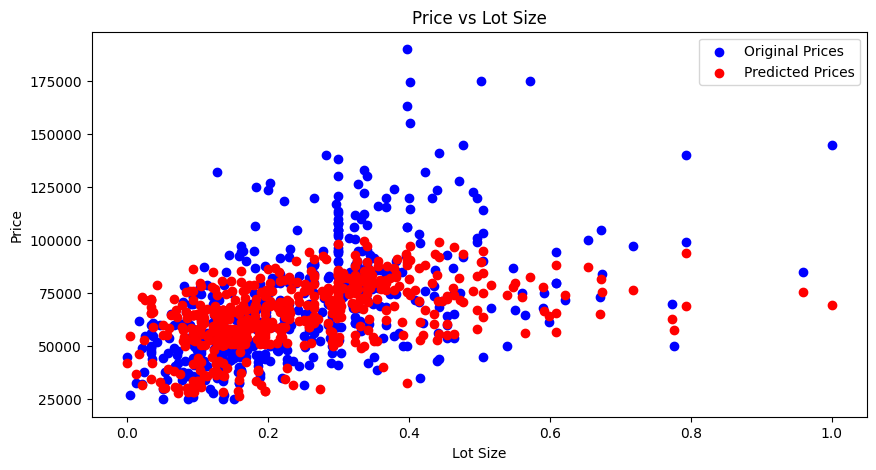

In [263]:
# Plotting Price vs Lot Size
plt.figure(figsize=(10, 5))
plt.scatter(X_original, y_original, color='blue', label='Original Prices')
plt.scatter(X_original, X.dot(weights)[:, 0], color='red', label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Lot Size')
plt.show()

**Observations:**
1. Predicted prices (red) closely follow the trend of actual prices (blue) but tend to underestimate higher prices.
2. The model captures the linear relationship but struggles with variance, particularly for larger lot sizes.
3. Predictions are clustered, indicating underfitting for higher lot sizes.

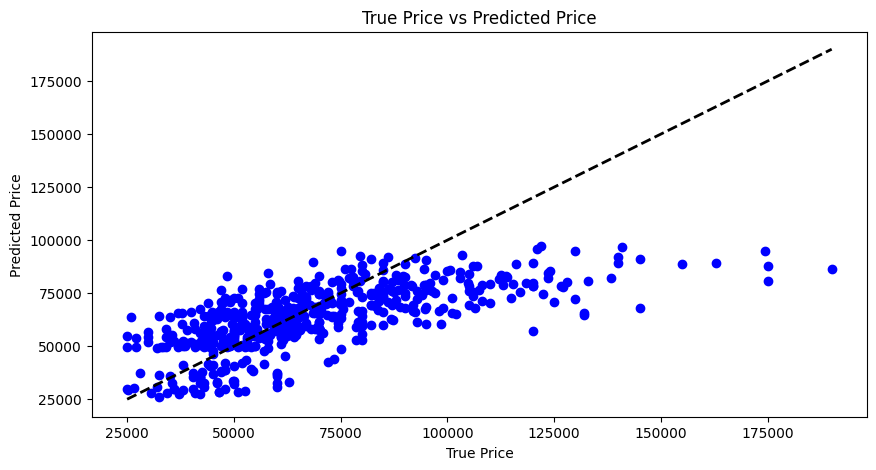

In [264]:
# Plotting True-Price vs Predicted-Price
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

**Observations:**

Underprediction for Higher Prices: Predicted prices (y-axis) tend to be lower than actual prices (x-axis), especially for higher true prices, as most points fall below the diagonal reference line.

Good Fit for Lower Prices: The model performs reasonably well for lower true prices, with predicted values closely aligned with the reference line.

Linear Trend: The overall distribution indicates the model captures a linear relationship between true and predicted prices but fails to generalize well for high price ranges.

# Calculate R^2 score

In [265]:
# Calculate and display R^2 score
ss_total = np.sum((y - y.mean()) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)
print(f"R^2 score: {r2}")

R^2 score: 0.4235729962292776


# 1-2. (2pts) Please build a gradient descent algorithm based on the following cost function.
 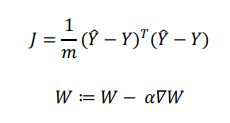

 # Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
# Please fit the data using the Linear regression model with the optimum Weight.
# Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.



# Preparing data for training (all features normalized except price)

In [266]:
# Preparing data for training (all features normalized except price)
X = np.c_[np.ones(house.shape[0]), house[['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']].values]
y = house['price'].values.reshape(-1, 1)

# Hyperparameters

In [267]:
# Hyperparameters
alpha = 0.1  # Learning rate
epochs = 10   # Number of epochs
m = y.size    # Number of samples

In [268]:
# Initialize weights
weights = np.random.rand(X.shape[1], 1)

# Gradient Descent

In [269]:
# Gradient Descent
for epoch in range(epochs):
    # Prediction
    y_pred = X.dot(weights)

    # Calculate RMSE
    rmse = np.sqrt(((y_pred - y) ** 2).mean())
    print(f"Epoch {epoch + 1}: RMSE = {rmse}")

    # Update weights using the given cost function gradient
    gradients = (2/m) * X.T.dot(y_pred - y)  # Gradient of the cost function
    weights -= alpha * gradients

Epoch 1: RMSE = 73157.40074076643
Epoch 2: RMSE = 40241.22596431088
Epoch 3: RMSE = 26381.81758191965
Epoch 4: RMSE = 21556.96234102686
Epoch 5: RMSE = 20100.932673715022
Epoch 6: RMSE = 19637.046164713924
Epoch 7: RMSE = 19436.081348277137
Epoch 8: RMSE = 19305.074222768988
Epoch 9: RMSE = 19195.144985924693
Epoch 10: RMSE = 19093.90406784184


# Evaluation and Plotting:

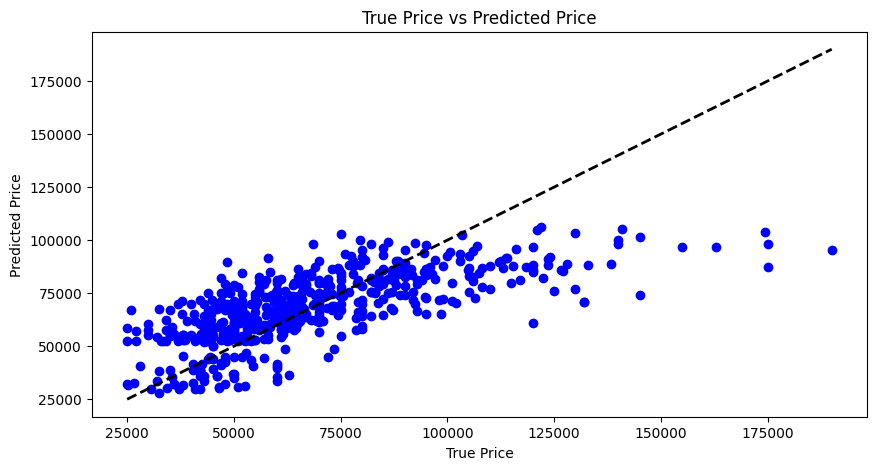

In [270]:
# Plotting True-Price vs Predicted-Price (predictions using all features)
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

### Observations:

1. **Improved Prediction Alignment**: Predicted prices (y-axis) align more closely with true prices (x-axis) compared to the previous plot. This indicates better model performance.
   
2. **Slight Underprediction for Higher Prices**: While higher prices are still underpredicted, the deviation is less pronounced compared to the first method.
   
3. **Consistent Linear Trend**: The predictions follow a clear linear relationship with true prices, with most points clustered near the diagonal line.

4. **Reduced Variance in Predictions**: The spread of predicted values around the diagonal is smaller, showing a more consistent fit across the range of true prices.


The second gradient descent method appears to improve the model’s fit slightly.


# R-square

In [271]:
# Calculate and display R^2 score
ss_total = np.sum((y - y.mean()) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)
print(f"R^2 score: {r2}")

R^2 score: 0.48775679571523256


### Comparison of R² Scores:
1. **First Gradient Descent Method**:
   - \( R^2 \) score: **0.4236**
   - This indicates that about **42.36% of the variance** in the price data is explained by the model using the first gradient descent method.

2. **Second Gradient Descent Method**:
   - \( R^2 \) score: **0.4878**
   - This shows that about **48.78% of the variance** in the price data is explained by the model using the second gradient descent method.

### Observations:
- The second gradient descent method provides a higher \( R^2 \) score, indicating better performance and a stronger fit to the data.
- The improvement in \( R^2 \) suggests that the second method better captures the relationship between the features and the target variable.

### Conclusion:
The second gradient descent method is more effective, achieving a better balance between minimizing error and fitting the data. To further improve the model, additional features or more advanced modeling techniques could be explored.


# 2. (5 pts) Binary classification with logistic regression

Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The
target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease
(CHD). You can find a description of the variables in cardiovascular.txt.
This is the task of Binary classification with logistic regression. You need to build a logistic regression model from
scratch to predict ‘TenYearCHD’.

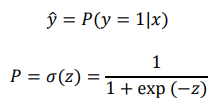

Before applying gradient descent method, you might need to fill out missing value and normalize variables.
Please build a gradient descent algorithm based on the following formulas. Instead, you may build an algorithm
based on the matrix formula.

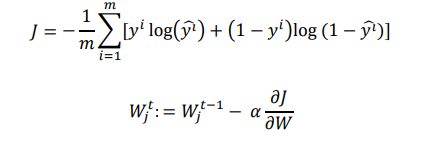

Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset.
Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset
after the last iteration.

# Importing Libraries and dataset

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the training and test datasets
train_path = 'heart_disease_train.csv'
test_path = 'heart_disease_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)



In [273]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3306 non-null   float64
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3365 non-null   float64
 5   BPMeds           3348 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3346 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3374 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3075 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB
<class 'panda

In [274]:
## Check for Missing Values

In [275]:
train_data.isnull().sum()

,0
gender,0
age,0
education,84
currentSmoker,0
cigsPerDay,25
BPMeds,42
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,44


In [276]:
test_data.isnull().sum()

,0
gender,0
age,0
education,21
currentSmoker,0
cigsPerDay,4
BPMeds,11
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,6


## Using Subclass method for imputation:

Using subclass-based missing value imputation can improve the accuracy and relevance of the data imputation process, particularly in datasets where missing values are influenced by categorical or subgroup characteristics.

**Categorical Features for Grouping:**

Grouping candidates for subclass imputation:

* gender: Binary (0 = Female, 1 = Male)
* currentSmoker: Binary (0 = Non-smoker, 1 = Smoker)
* prevalentHyp: Binary (0 = No, 1 = Yes)

The chosen subgroups (e.g., gender, currentSmoker, diabetes) have clear logical relationships with the features being imputed.

Grouping ensures that:
* Imputed values respect inherent patterns in the data.
* Bias is minimized.
* Variations meaningful for downstream analysis or modeling are preserved.


Below have plotted the distributions of each feature with their subgroups to analyse

## Train Data

In [277]:
education_w_gender = train_data.groupby('gender')['education']
cigs_per_day_w_currentSmoker = train_data.groupby('currentSmoker')['cigsPerDay']
bp_meds_w_prevalentHyp = train_data.groupby('prevalentHyp')['BPMeds']
bp_meds_w_gender = train_data.groupby('gender')['BPMeds']
tot_chol_w_gender = train_data.groupby('gender')['totChol']
bmi_groups_w_gender = train_data.groupby('gender')['BMI']
heart_rate_w_heartRate = train_data['heartRate']
glucose_w_diabetes = train_data.groupby('diabetes')['glucose']

In [278]:
education_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,1882.0,1.965462,0.960893,1.0,1.0,2.0,3.0,4.0
1,1424.0,2.002107,1.099733,1.0,1.0,2.0,3.0,4.0


## Education

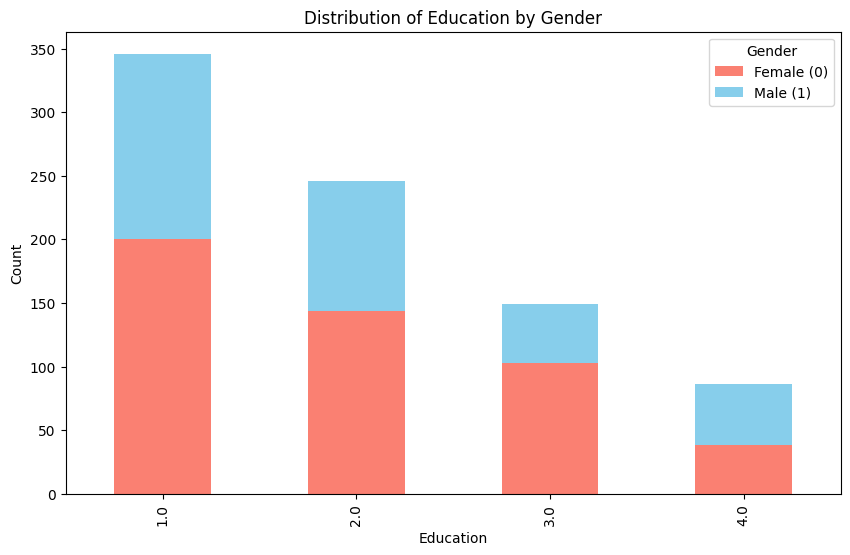

In [279]:
# Prepare data for the histogram
education_female = train_data[train_data['gender'] == 0]['education'].dropna()
education_male = train_data[train_data['gender'] == 1]['education'].dropna()


# Recreate stacked bar plot
education_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Distribution of Education by Gender')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.show()

### **Observations for Education by Gender Subgroup**

1. **Justification for Subgrouping by Gender**:
   - Education levels differ between genders:
     - Females (gender = 0): Lower mean (1.96) and less variability (std = 0.96).
     - Males (gender = 1): Slightly higher mean (2.00) and greater variability (std = 1.10).
   - The stacked bar plot shows males have slightly more individuals in higher education levels (e.g., `education=3` and `education=4`).
   - Grouping by gender accounts for socio-cultural differences in education levels.

2. **Imputation Method**:
   - **Mode** is ideal for imputing `education` as it is a discrete categorical variable, ensuring realistic and valid values.

3. **Conclusion**:
   - **Subgroup**: Group by `gender` to respect differences.
   - **Method**: Use **mode** to impute missing values.


## cigs_per_day

In [280]:
cigs_per_day_w_currentSmoker.describe()

,count,mean,std,min,25%,50%,75%,max
currentSmoker,,,,,,,,
0,1740.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1625.0,18.559385,11.026349,1.0,10.0,20.0,20.0,70.0


<ipython-input-281-a4eb33ce8420>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cigs_per_day_counts = train_data.groupby(['cigsPerDay_binned', 'currentSmoker']).size().unstack(fill_value=0)


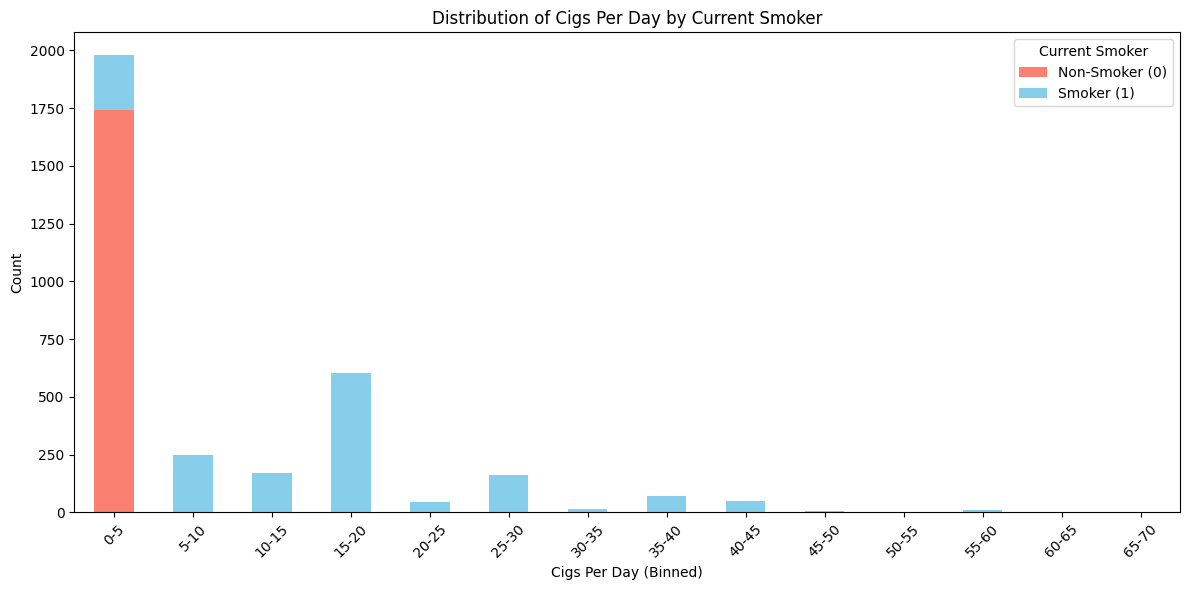

In [281]:
# Define bins for CigsPerDay
bins = np.arange(0, train_data['cigsPerDay'].max() + 5, 5)  # Create bins of size 5
labels = [f"{int(b)}-{int(b+5)}" for b in bins[:-1]]

# Group CigsPerDay into bins
train_data['cigsPerDay_binned'] = pd.cut(train_data['cigsPerDay'], bins=bins, labels=labels, include_lowest=True)

# Prepare data for stacked bar plot
cigs_per_day_counts = train_data.groupby(['cigsPerDay_binned', 'currentSmoker']).size().unstack(fill_value=0)

# Plot the stacked bar chart
cigs_per_day_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title('Distribution of Cigs Per Day by Current Smoker')
plt.xlabel('Cigs Per Day (Binned)')
plt.ylabel('Count')
plt.legend(title='Current Smoker', labels=['Non-Smoker (0)', 'Smoker (1)'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

## **Cigarettes Per Day (CigsPerDay) Grouped by Current Smoker**
- **Statistics**:
  - Non-Smokers (currentSmoker = 0): Mean = 0, Std = 0.
  - Smokers (currentSmoker = 1): Mean = 18.56, Std = 11.03.
- **Graph Observations**:
  - Non-smokers (currentSmoker = 0) cluster entirely at 0 cigarettes per day, with no variability.
  - Smokers (currentSmoker = 1) have a wide distribution, peaking around 20 cigarettes per day.
- **Imputation Method**:
  - For non-smokers: Impute missing values with 0.
  - For smokers: Use the mean to account for their variability.

In [282]:
# dropping not required column
train_data = train_data.drop(columns=['cigsPerDay_binned'])

## bp_meds

In [283]:
bp_meds_w_prevalentHyp.describe()

,count,mean,std,min,25%,50%,75%,max
prevalentHyp,,,,,,,,
0,2340.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1008.0,0.094246,0.292316,0.0,0.0,0.0,0.0,1.0


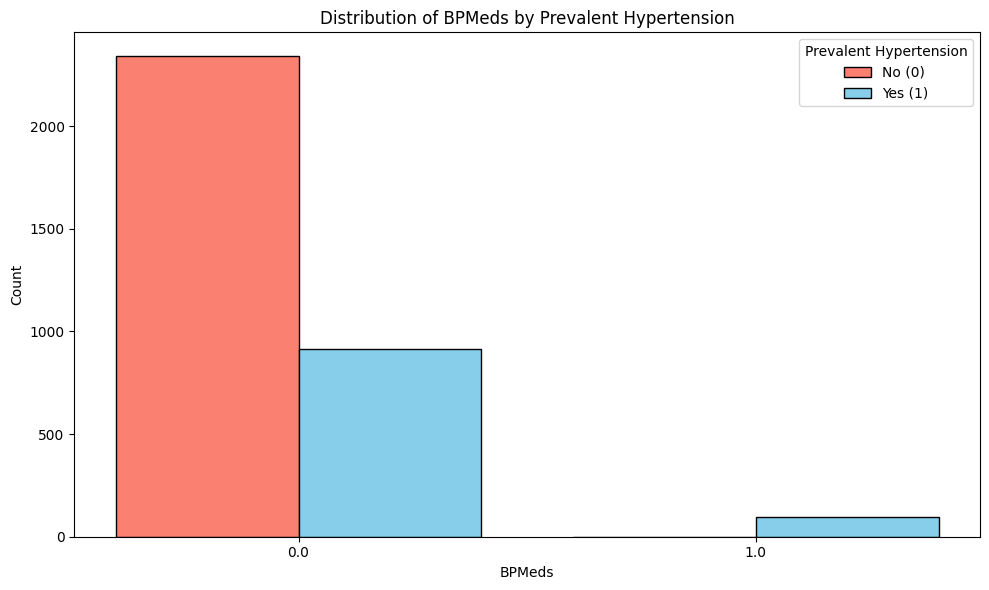

In [284]:

# Prepare data for dodge-style bar plot
bp_meds_hyp_counts = train_data.groupby(['BPMeds', 'prevalentHyp']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = bp_meds_hyp_counts.index  # BPMeds values
width = 0.4  # Width of the bars

# Bar positions
x_pos = range(len(x))
ax.bar([pos - width/2 for pos in x_pos], bp_meds_hyp_counts[0], width, label='No (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x_pos], bp_meds_hyp_counts[1], width, label='Yes (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of BPMeds by Prevalent Hypertension')
ax.set_xlabel('BPMeds')
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=0)  # BPMeds values as x-tick labels
ax.legend(title='Prevalent Hypertension')

plt.tight_layout()
plt.show()


In [285]:
bp_meds_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,1889.0,0.037586,0.190243,0.0,0.0,0.0,0.0,1.0
1,1459.0,0.016450,0.127240,0.0,0.0,0.0,0.0,1.0


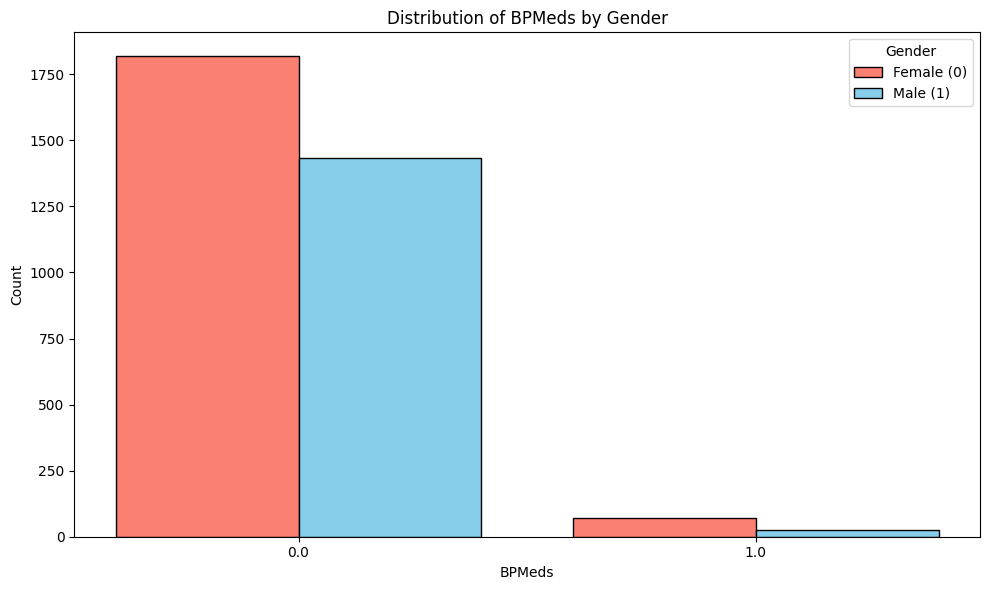

In [286]:
# Prepare data for dodge-style bar plot
bp_meds_gender_counts = train_data.groupby(['BPMeds', 'gender']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = bp_meds_gender_counts.index  # BPMeds values
width = 0.4  # Width of the bars

# Bar positions
x_pos = range(len(x))
ax.bar([pos - width/2 for pos in x_pos], bp_meds_gender_counts[0], width, label='Female (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x_pos], bp_meds_gender_counts[1], width, label='Male (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of BPMeds by Gender')
ax.set_xlabel('BPMeds')
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=0)  # BPMeds values as x-tick labels
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


##The grouping "BP Medications by Prevalent Hypertension" is the better choice because:

* It aligns directly with a health-related factor (prevalent hypertension).
* It provides meaningful insights into the relationship between the medical condition and BP medication usage.
* Gender-based grouping, while informative, is less relevant for health-related analysis in this case.

For missing value imputation, grouping by **prevalent hypertension** is more clinically and logically appropriate.

## tot_chol

In [287]:
tot_chol_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,1882.0,239.783209,47.047927,107.0,206.0,237.0,270.0,600.0
1,1464.0,232.872951,42.765334,113.0,205.0,230.0,258.0,696.0


<ipython-input-288-21d43a50a89f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_chol_gender_counts = train_data.groupby([pd.cut(train_data['totChol'], bins), 'gender']).size().unstack(fill_value=0)


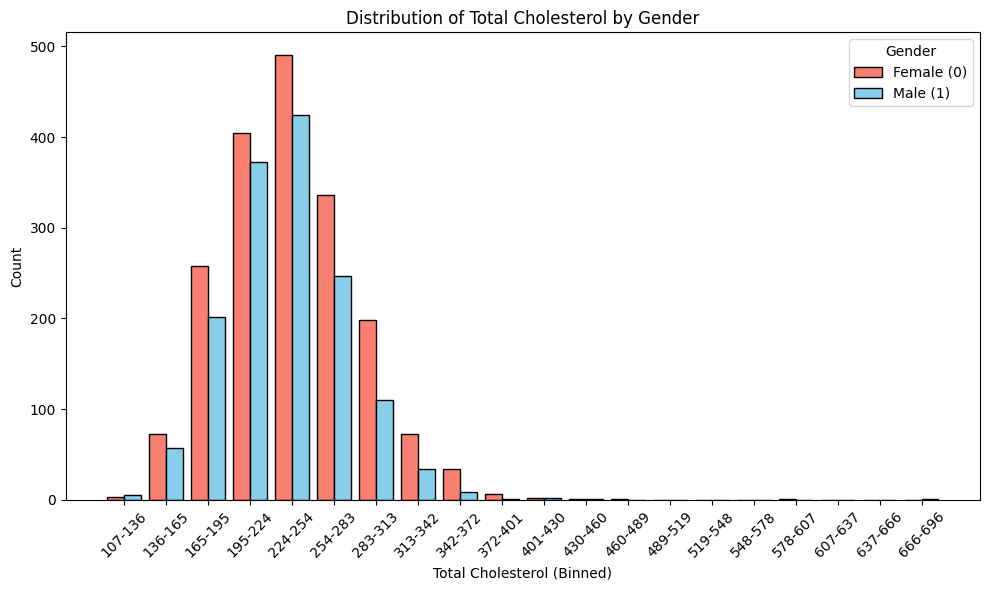

In [288]:

# Define bins for TotChol
bins = np.linspace(train_data['totChol'].min(), train_data['totChol'].max(), 21)  # 20 bins

# Group TotChol by bins
tot_chol_gender_counts = train_data.groupby([pd.cut(train_data['totChol'], bins), 'gender']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(tot_chol_gender_counts))  # Bin positions
width = 0.4  # Width of the bars

# Bar positions
ax.bar([pos - width/2 for pos in x], tot_chol_gender_counts[0], width, label='Female (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x], tot_chol_gender_counts[1], width, label='Male (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of Total Cholesterol by Gender')
ax.set_xlabel('Total Cholesterol (Binned)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in tot_chol_gender_counts.index], rotation=45)  # Bin labels
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


## **Total Cholesterol (TotChol) Grouped by Gender**
- **Statistics**:
  - Females: Mean = 239.78, Std = 47.05.
  - Males: Mean = 232.87, Std = 42.77.
- **Graph Observations**:
  - Cholesterol levels are slightly higher for females compared to males.
  - Both distributions show a near-normal shape with the majority clustering around 200–270.
- **Imputation Method**: Mean (to reflect the continuous nature of total cholesterol levels).


## bmi

In [289]:
bmi_groups_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,1908.0,25.472348,4.429475,15.96,22.5100,24.79,27.7125,56.80
1,1466.0,26.212340,3.440192,15.54,23.9525,26.09,28.3600,40.38


<ipython-input-290-0673f8652fc9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_gender_counts = train_data.groupby([pd.cut(train_data['BMI'], bins), 'gender']).size().unstack(fill_value=0)


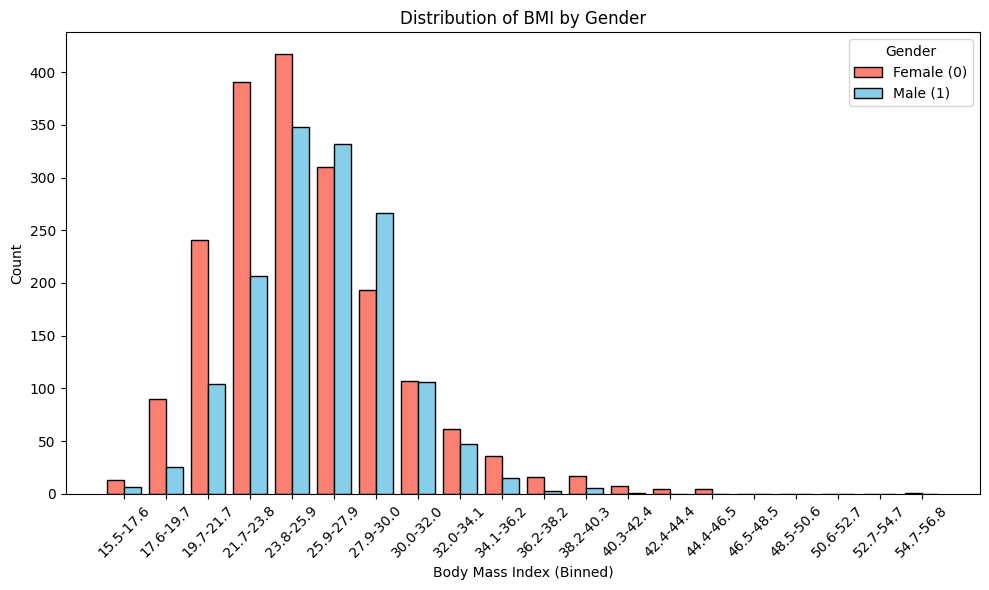

In [290]:
# Define bins for BMI
bins = np.linspace(train_data['BMI'].min(), train_data['BMI'].max(), 21)  # 20 bins

# Group BMI by bins and gender
bmi_gender_counts = train_data.groupby([pd.cut(train_data['BMI'], bins), 'gender']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(bmi_gender_counts))  # Bin positions
width = 0.4  # Width of the bars

# Bar positions
ax.bar([pos - width/2 for pos in x], bmi_gender_counts[0], width, label='Female (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x], bmi_gender_counts[1], width, label='Male (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of BMI by Gender')
ax.set_xlabel('Body Mass Index (Binned)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels([f"{round(bin.left, 1)}-{round(bin.right, 1)}" for bin in bmi_gender_counts.index], rotation=45)  # Bin labels
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


## **BMI Grouped by Gender**
- **Statistics**:
  - Females: Mean = 25.47, Std = 4.42.
  - Males: Mean = 26.21, Std = 3.44.
- **Graph Observations**:
  - BMI distributions for both genders overlap significantly, with males showing a slightly higher mean.
  - Both genders exhibit a peak around BMI = 25–27.
- **Imputation Method**: Mean (BMI is a continuous variable and distribution supports mean-based imputation).


## heart_rate

In [291]:
heart_rate_group.describe()

,heartRate
count,3389.000000
mean,75.776335
std,11.952094
min,44.000000
25%,68.000000
50%,75.000000
75%,82.000000
max,143.000000


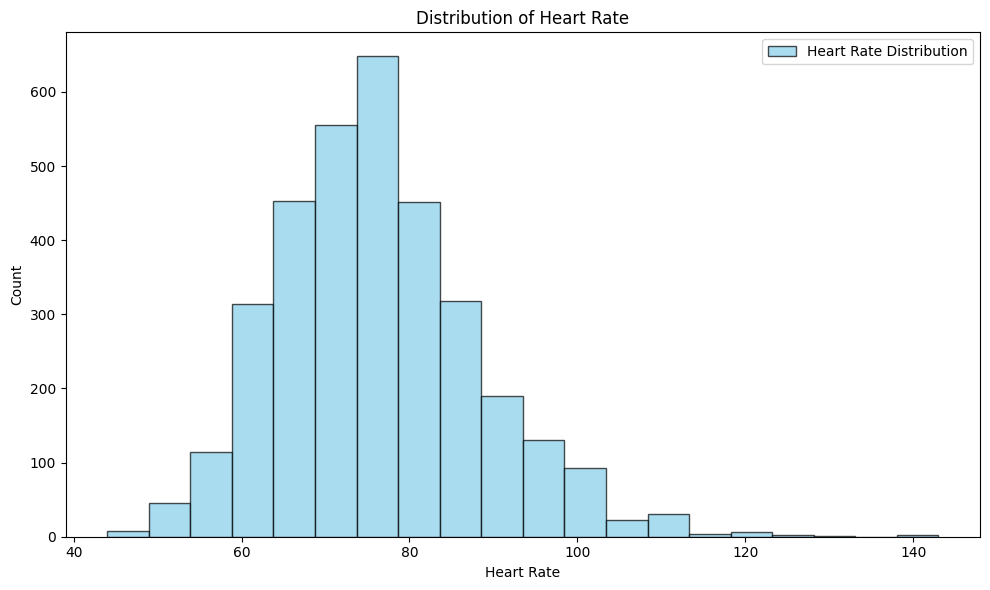

In [292]:

# Define bins for HeartRate
bins = np.linspace(train_data['heartRate'].min(), train_data['heartRate'].max(), 21)  # 20 bins

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(train_data['heartRate'], bins=bins, color="skyblue", edgecolor='black', alpha=0.7, label='Heart Rate Distribution')

# Add titles, labels, and legend
ax.set_title('Distribution of Heart Rate')
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Count')
ax.legend()

plt.tight_layout()
plt.show()


## **Heart Rate**
- **Statistics**:
  - Heart rate is a continuous variable.
- **Graph Observations**:
  - Heart rate shows a near-normal distribution with no clear skewness.
- **Imputation Method**: Mean (since the distribution is symmetric).

## Glucose

In [293]:
glucose_w_diabetes.describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,2994.0,79.647629,12.931768,40.0,71.0,78.0,86.0,163.0
1,81.0,169.827160,87.969425,47.0,109.0,144.0,215.0,394.0


<ipython-input-294-83b97c65550c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_diabetes_counts = train_data.groupby([pd.cut(train_data['glucose'], bins), 'diabetes']).size().unstack(fill_value=0)


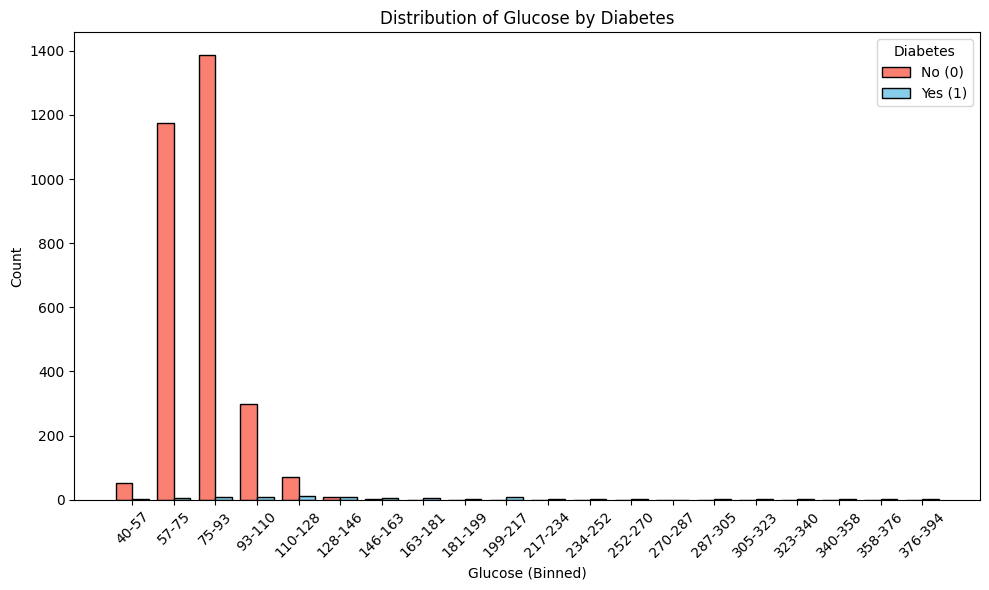

In [294]:
# Define bins for Glucose
bins = np.linspace(train_data['glucose'].min(), train_data['glucose'].max(), 21)  # 20 bins

# Group Glucose by bins and Diabetes
glucose_diabetes_counts = train_data.groupby([pd.cut(train_data['glucose'], bins), 'diabetes']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(glucose_diabetes_counts))  # Bin positions
width = 0.4  # Width of the bars

# Bar positions
ax.bar([pos - width/2 for pos in x], glucose_diabetes_counts[0], width, label='No (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x], glucose_diabetes_counts[1], width, label='Yes (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of Glucose by Diabetes')
ax.set_xlabel('Glucose (Binned)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in glucose_diabetes_counts.index], rotation=45)  # Bin labels
ax.legend(title='Diabetes')

plt.tight_layout()
plt.show()


## **Glucose Grouped by Diabetes**
- **Statistics**:
  - Non-diabetic individuals (diabetes = 0): Mean = 79.65, Std = 12.93.
  - Diabetic individuals (diabetes = 1): Mean = 169.83, Std = 87.97.
- **Graph Observations**:
  - Glucose levels are tightly distributed for non-diabetics, clustering around 75–90.
  - Diabetic individuals have a wider and significantly higher glucose distribution.
- **Imputation Method**:
  - Use separate means for diabetics and non-diabetics, as the two groups exhibit distinct glucose distributions.


## Test Data

Implmenting the same for test data as well

In [295]:
education_w_gender = test_data.groupby('gender')['education']
cigs_per_day_w_currentSmoker = test_data.groupby('currentSmoker')['cigsPerDay']
bp_meds_w_prevalentHyp = test_data.groupby('prevalentHyp')['BPMeds']
bp_meds_w_gender = test_data.groupby('gender')['BPMeds']
tot_chol_w_gender = test_data.groupby('gender')['totChol']
bmi_groups_w_gender = test_data.groupby('gender')['BMI']
heart_rate_w_heartRate = test_data['heartRate']
glucose_w_diabetes = test_data.groupby('diabetes')['glucose']

In [296]:
education_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,485.0,1.956701,0.968609,1.0,1.0,2.0,3.0,4.0
1,342.0,1.988304,1.061114,1.0,1.0,2.0,3.0,4.0


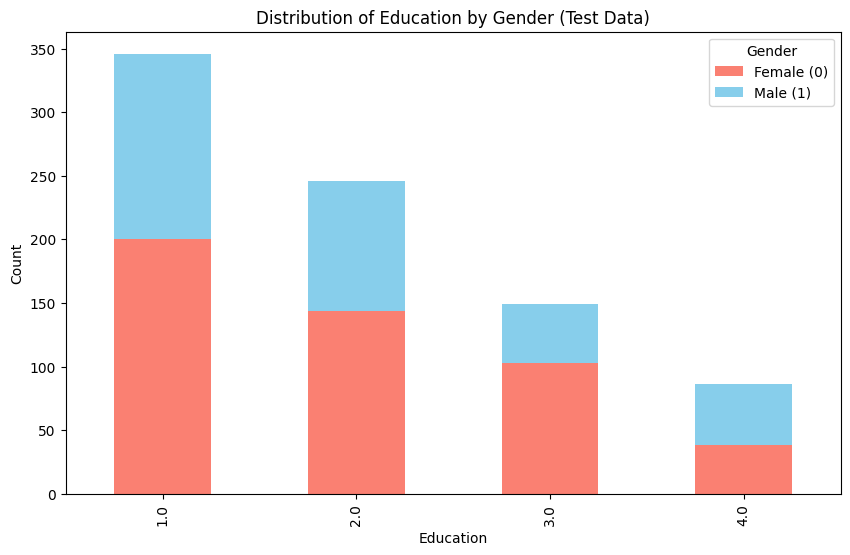

In [297]:
# Prepare data for the histogram
education_female = test_data[test_data['gender'] == 0]['education'].dropna()
education_male = test_data[test_data['gender'] == 1]['education'].dropna()

# Group data for the stacked bar plot
education_gender_counts = test_data.groupby(['education', 'gender']).size().unstack(fill_value=0)

# Recreate stacked bar plot
education_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Distribution of Education by Gender (Test Data)')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.show()


In [298]:
cigs_per_day_w_currentSmoker.describe()

,count,mean,std,min,25%,50%,75%,max
currentSmoker,,,,,,,,
0,404.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,440.0,17.579545,10.226948,1.0,10.0,20.0,20.0,60.0


<ipython-input-299-9c84a6de0b5b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cigs_per_day_counts = test_data.groupby(['cigsPerDay_binned', 'currentSmoker']).size().unstack(fill_value=0)


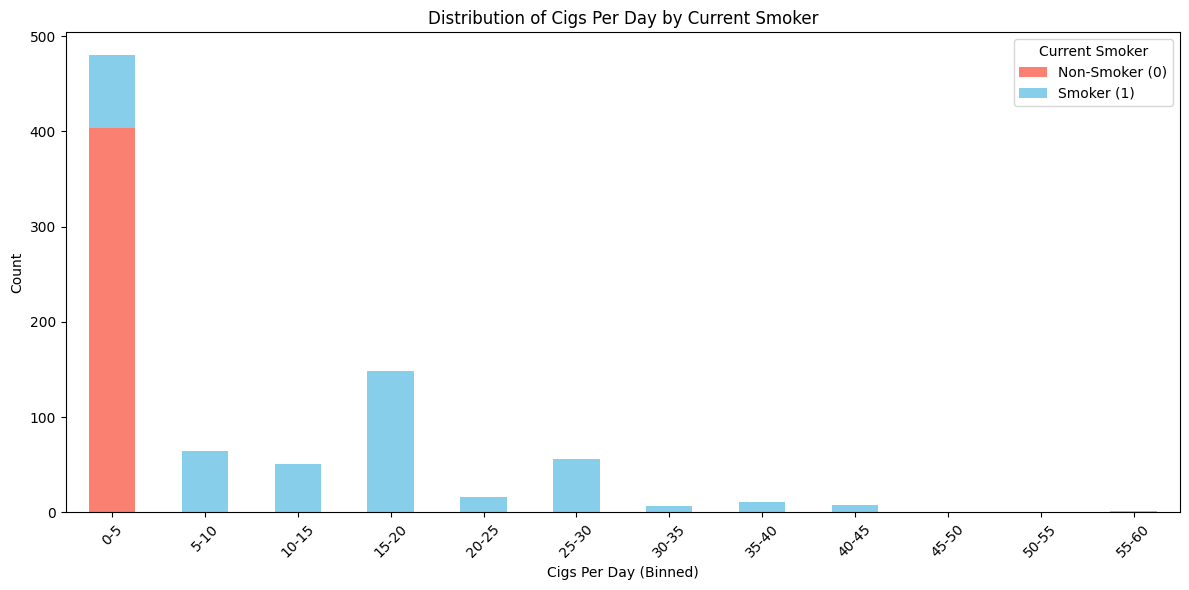

In [299]:
# Define bins for CigsPerDay
bins = np.arange(0, test_data['cigsPerDay'].max() + 5, 5)  # Create bins of size 5
labels = [f"{int(b)}-{int(b+5)}" for b in bins[:-1]]

# Group CigsPerDay into bins
test_data['cigsPerDay_binned'] = pd.cut(test_data['cigsPerDay'], bins=bins, labels=labels, include_lowest=True)

# Prepare data for stacked bar plot
cigs_per_day_counts = test_data.groupby(['cigsPerDay_binned', 'currentSmoker']).size().unstack(fill_value=0)

# Plot the stacked bar chart
cigs_per_day_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title('Distribution of Cigs Per Day by Current Smoker')
plt.xlabel('Cigs Per Day (Binned)')
plt.ylabel('Count')
plt.legend(title='Current Smoker', labels=['Non-Smoker (0)', 'Smoker (1)'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [300]:
# Dropping not required column

test_data = test_data.drop(columns=['cigsPerDay_binned'])


In [301]:
bp_meds_w_prevalentHyp.describe()

,count,mean,std,min,25%,50%,75%,max
prevalentHyp,,,,,,,,
0,551.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,286.0,0.101399,0.302385,0.0,0.0,0.0,0.0,1.0


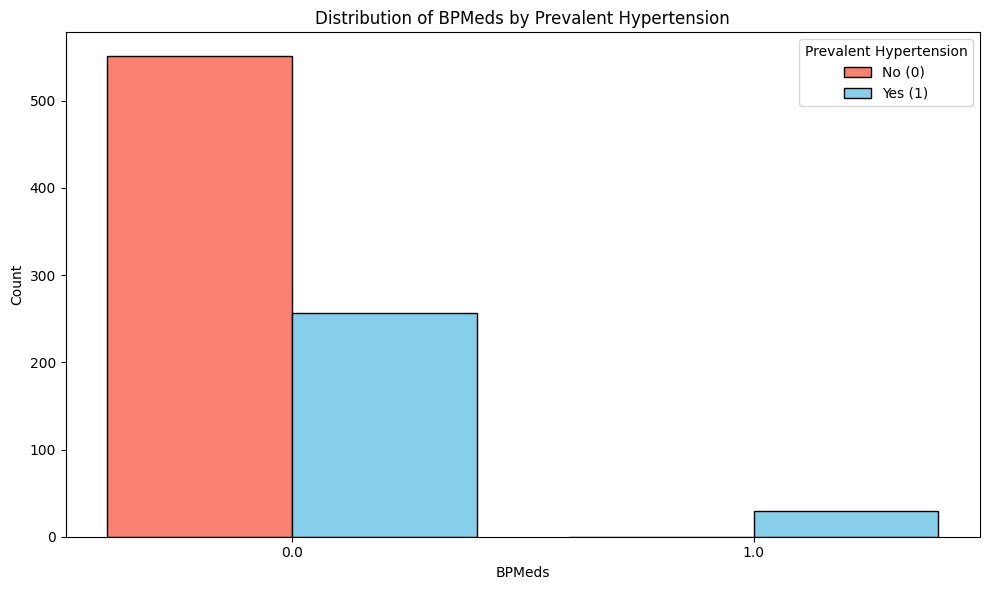

In [302]:

# Prepare data for dodge-style bar plot
bp_meds_hyp_counts = test_data.groupby(['BPMeds', 'prevalentHyp']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = bp_meds_hyp_counts.index  # BPMeds values
width = 0.4  # Width of the bars

# Bar positions
x_pos = range(len(x))
ax.bar([pos - width/2 for pos in x_pos], bp_meds_hyp_counts[0], width, label='No (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x_pos], bp_meds_hyp_counts[1], width, label='Yes (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of BPMeds by Prevalent Hypertension')
ax.set_xlabel('BPMeds')
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=0)  # BPMeds values as x-tick labels
ax.legend(title='Prevalent Hypertension')

plt.tight_layout()
plt.show()


In [303]:
bp_meds_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,492.0,0.036585,0.187933,0.0,0.0,0.0,0.0,1.0
1,345.0,0.031884,0.175947,0.0,0.0,0.0,0.0,1.0


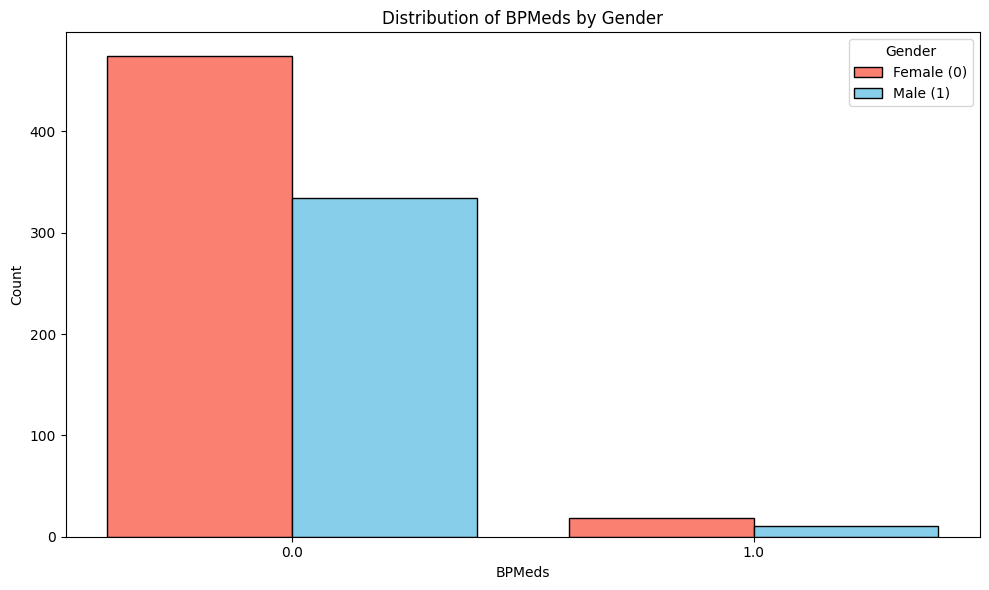

In [304]:

# Prepare data for dodge-style bar plot
bp_meds_gender_counts = test_data.groupby(['BPMeds', 'gender']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = bp_meds_gender_counts.index  # BPMeds values
width = 0.4  # Width of the bars

# Bar positions
x_pos = range(len(x))
ax.bar([pos - width/2 for pos in x_pos], bp_meds_gender_counts[0], width, label='Female (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x_pos], bp_meds_gender_counts[1], width, label='Male (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of BPMeds by Gender')
ax.set_xlabel('BPMeds')
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=0)  # BPMeds values as x-tick labels
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


In [305]:
tot_chol_w_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,494.0,238.226721,42.828414,145.0,205.25,238.0,265.0,392.0
1,348.0,234.218391,39.405942,148.0,206.00,232.0,258.0,453.0


<ipython-input-306-3a9345559ac8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_chol_gender_counts = test_data.groupby([pd.cut(test_data['totChol'], bins), 'gender']).size().unstack(fill_value=0)


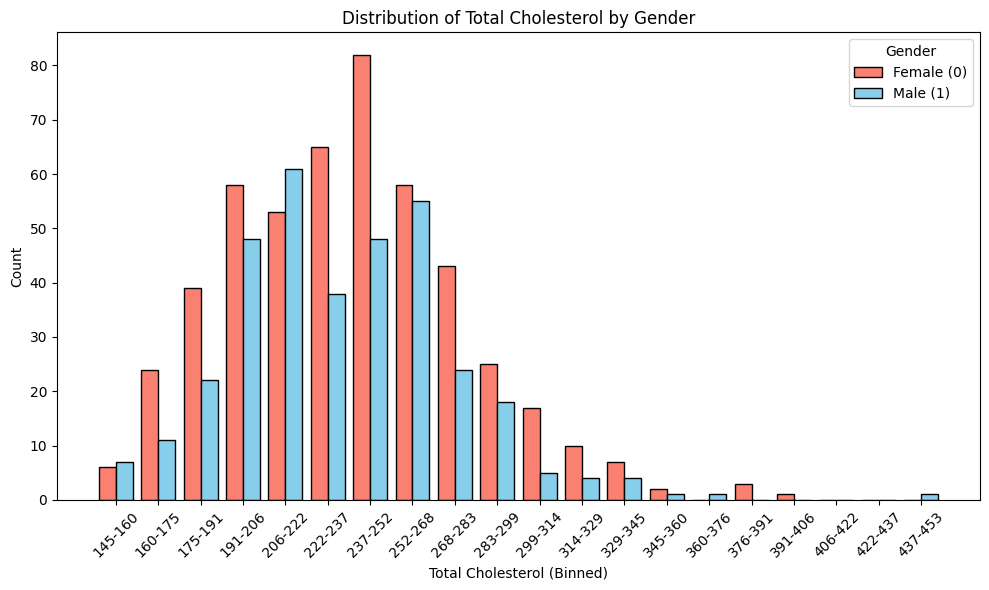

In [306]:
# Define bins for TotChol
bins = np.linspace(test_data['totChol'].min(), test_data['totChol'].max(), 21)  # 20 bins

# Group TotChol by bins
tot_chol_gender_counts = test_data.groupby([pd.cut(test_data['totChol'], bins), 'gender']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(tot_chol_gender_counts))  # Bin positions
width = 0.4  # Width of the bars

# Bar positions
ax.bar([pos - width/2 for pos in x], tot_chol_gender_counts[0], width, label='Female (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x], tot_chol_gender_counts[1], width, label='Male (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of Total Cholesterol by Gender')
ax.set_xlabel('Total Cholesterol (Binned)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in tot_chol_gender_counts.index], rotation=45)  # Bin labels
ax.legend(title='Gender')

plt.tight_layout()
plt.show()

In [307]:
heart_rate_w_heartRate.describe()

,heartRate
count,848.000000
mean,76.288915
std,12.318492
min,45.000000
25%,67.750000
50%,75.000000
75%,85.000000
max,125.000000


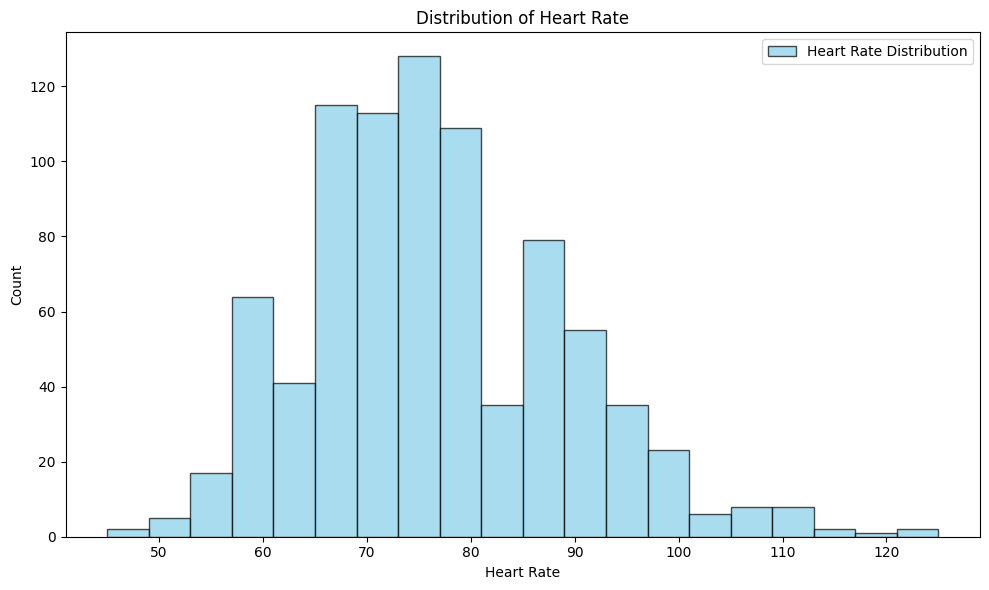

In [308]:
# Define bins for HeartRate
bins = np.linspace(test_data['heartRate'].min(), test_data['heartRate'].max(), 21)  # 20 bins

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(test_data['heartRate'], bins=bins, color="skyblue", edgecolor='black', alpha=0.7, label='Heart Rate Distribution')



# Add titles, labels, and legend
ax.set_title('Distribution of Heart Rate')
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Count')
ax.legend()

plt.tight_layout()
plt.show()

In [309]:
glucose_w_diabetes.describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,751.0,78.857523,13.061891,40.0,70.00,77.0,85.0,140.0
1,24.0,172.041667,71.841298,80.0,118.75,157.0,245.5,325.0


<ipython-input-310-0cfc7e2930dd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_diabetes_counts = test_data.groupby([pd.cut(test_data['glucose'], bins), 'diabetes']).size().unstack(fill_value=0)


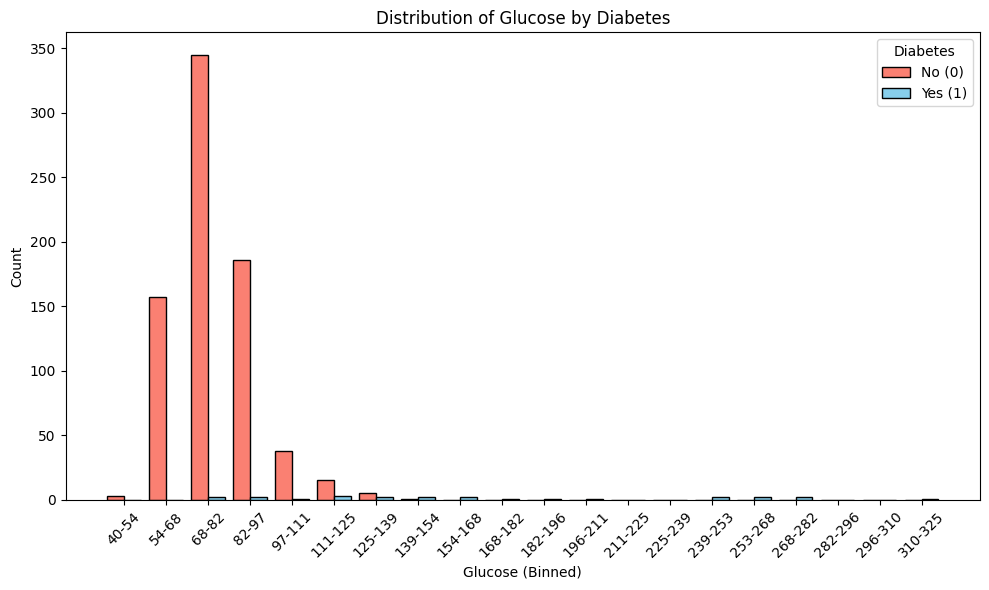

In [310]:
# Define bins for Glucose
bins = np.linspace(test_data['glucose'].min(), test_data['glucose'].max(), 21)  # 20 bins

# Group Glucose by bins and Diabetes
glucose_diabetes_counts = test_data.groupby([pd.cut(test_data['glucose'], bins), 'diabetes']).size().unstack(fill_value=0)

# Plot dodge-style bars
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(glucose_diabetes_counts))  # Bin positions
width = 0.4  # Width of the bars

# Bar positions
ax.bar([pos - width/2 for pos in x], glucose_diabetes_counts[0], width, label='No (0)', color='salmon', edgecolor='black')
ax.bar([pos + width/2 for pos in x], glucose_diabetes_counts[1], width, label='Yes (1)', color='skyblue', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Distribution of Glucose by Diabetes')
ax.set_xlabel('Glucose (Binned)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in glucose_diabetes_counts.index], rotation=45)  # Bin labels
ax.legend(title='Diabetes')

plt.tight_layout()
plt.show()


## Observations for Test Data

**All the distributions look similar to train_data so will keep the choice similar to train_data to maintain the same distribution**

# Imputing Missing Values using Subclass Method

In [311]:
# Function for subclass imputation
def subclass_imputation(data, feature, group_by, statistic='mode'):
    """
    Impute missing values for a feature by grouping based on a categorical variable
    and using the specified statistic (mean, median, or mode).
    """
    data = data.copy()
    grouped = data.groupby(group_by)

    if statistic == 'mean':
        group_stats = grouped[feature].mean()
    elif statistic == 'median':
        group_stats = grouped[feature].median()
    elif statistic == 'mode':
        group_stats = grouped[feature].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    else:
        raise ValueError("Statistic must be 'mean', 'median', or 'mode'")

    def impute(row):
        if pd.isnull(row[feature]):
            return group_stats[row[group_by]]
        else:
            return row[feature]

    data[feature] = data.apply(impute, axis=1)

    if data[feature].isnull().sum() > 0:
        overall_stat = data[feature].agg(statistic)
        data[feature].fillna(overall_stat, inplace=True)

    return data

# Perform subclass imputation for all missing features
features_to_impute = {
    'education': ('gender', 'mode'),
    'cigsPerDay': ('currentSmoker', 'mean'),
    'BPMeds': ('prevalentHyp', 'median'),
    'totChol': ('gender', 'mean'),
    'BMI': ('gender', 'mean'),
    'heartRate': ('gender', 'mean'),
    'glucose': ('diabetes', 'mean')
}

for feature, (group_by, statistic) in features_to_impute.items():
    train_data = subclass_imputation(train_data, feature=feature, group_by=group_by, statistic=statistic)
    test_data = subclass_imputation(test_data, feature=feature, group_by=group_by, statistic=statistic)


In [312]:
train_data.isnull().sum()


,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [313]:
test_data.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## Normalizing Using Z Score

* Min-Max Normalization is more sensitive to outliers, which may lead to skewed scaling for features like cigsPerDay or glucose with extreme values.
* Z-Score ensures that features are standardized, making it easier for models like logistic regression or gradient-based methods to converge efficiently

In [314]:
# columns to normalize
to_normalize_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','education']

def normalize_columns(data, columns):
    """
    Normalize the specified columns in the dataset using z-score normalization.
    """
    for column in columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data

# Apply normalization
train_data_normalized = normalize_columns(train_data.copy(), to_normalize_columns)
test_data_normalized = normalize_columns(test_data.copy(), to_normalize_columns)


In [315]:
train_data_normalized.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1.554755,-0.936603,0,-0.751894,0.0,0,1,0,-1.038474,0.719949,0.607343,0.331195,-0.315962,0.179386,0
1,1,-0.535931,1.020909,0,-0.751894,0.0,0,0,0,-1.659959,-0.323238,0.523548,0.541790,0.771871,0.048696,0
2,0,0.160964,-0.936603,1,-0.585423,0.0,0,0,0,0.537436,-0.232526,-0.146815,-1.375856,-0.064924,0.615017,0
3,1,-0.535931,1.020909,1,1.745173,0.0,0,0,0,0.293281,-0.277882,0.565446,0.715220,-0.064924,0.440765,0
4,0,-0.535931,0.042153,1,-0.502188,0.0,0,0,0,0.293281,-0.096458,-0.230610,-1.375856,1.190268,0.179386,0


# Checking Distribution for Target Column

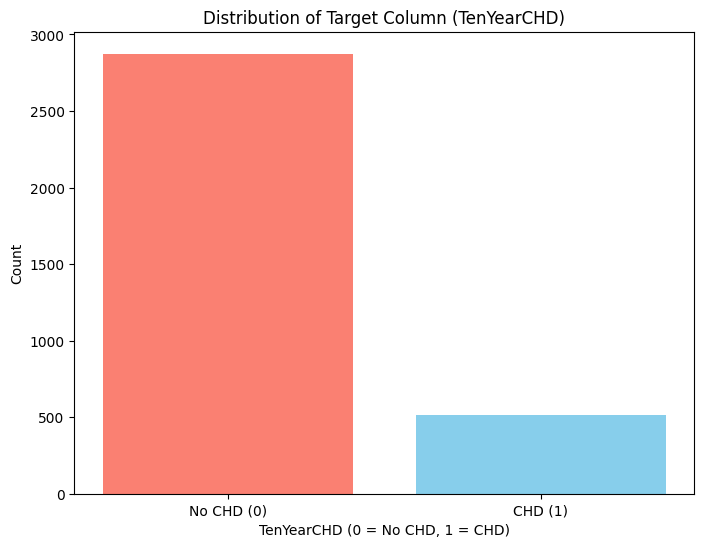

In [316]:
# Prepare data for the count plot
target_counts = train_data['TenYearCHD'].value_counts()

# Plot the distribution of the target column
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['salmon', 'skyblue'])
plt.title('Distribution of Target Column (TenYearCHD)')
plt.xlabel('TenYearCHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No CHD (0)', 'CHD (1)'])
plt.show()


**Observations for Target Distribution**
The target variable TenYearCHD is highly imbalanced, with most cases in the No CHD (0) class and very few in the CHD (1) class.

This imbalance can lead to a biased model that favors the majority class, reducing recall and precision for the minority class.

**Why Sampling?**
* Balance the Classes: Ensures the model learns patterns for both classes, not just the majority.
* Improve Metrics: Boosts recall and precision for the minority class (CHD (1)).
* Significance: Detecting CHD (1) is critical for timely medical intervention.
* Sampling (oversampling, undersampling, or both) helps create a balanced dataset for better model performance.











## Handling Data Imbalance

In [317]:
# Separate the majority and minority classes
class_0 = train_data_normalized[train_data_normalized['TenYearCHD'] == 0]
class_1 = train_data_normalized[train_data_normalized['TenYearCHD'] == 1]

# Oversample the minority class
oversampled_class_1 = class_1.sample(len(class_0), replace=True, random_state=42)

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([class_0, oversampled_class_1])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new class distribution
print(balanced_data['TenYearCHD'].value_counts())


TenYearCHD
0    2874
1    2874
Name: count, dtype: int64


In [318]:
balanced_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.232826,-0.936603,1,0.912817,0.0,0,0,0,-1.127258,-0.277882,-1.319950,-0.929892,-1.069077,-0.430498,0
1,0,0.044815,-0.936603,0,-0.751894,0.0,0,0,0,-1.060670,0.538525,0.439753,3.291902,-1.320116,0.222949,1
2,1,0.741710,-0.936603,0,-0.751894,0.0,0,0,0,0.515240,-0.255204,-0.565792,-0.161843,-1.487475,-0.517625,1
3,1,-0.535931,0.042153,1,0.912817,0.0,0,0,0,-0.949690,0.039610,0.020776,-1.333737,-1.738513,-0.256246,1
4,0,0.160964,-0.936603,1,-0.502188,0.0,0,0,0,0.204497,-0.935543,-0.733382,-0.174231,0.186115,-0.169119,0


# Defining Model Fuctions according to the formulas for Logistic Regression

In [319]:
# Step 1: Define sigmoid, cost function, and gradient descent
def sigmoid(z):
    """
    Compute the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    """
    Compute the logistic regression cost function.
    """
    m = len(y)
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, weights, learning_rate, epochs):
    """
    Perform gradient descent to optimize weights.
    """
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        print(f"Epoch {epoch+1}/{epochs}, Cost: {cost}")

    return weights, cost_history

In [320]:
# Step 2: Prepare the data

X_train = balanced_data.drop(columns=['TenYearCHD']).values
y_train = balanced_data['TenYearCHD'].values

X_test = test_data_normalized.drop(columns=['TenYearCHD']).values
y_test = test_data_normalized['TenYearCHD'].values



In [321]:
# Step 3: Train the model
# Initialize weights, learning rate, and epochs
weights = np.zeros(X_train.shape[1])
learning_rate = 0.3
epochs = 10

trained_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)


Epoch 1/10, Cost: 0.6740439727348269
Epoch 2/10, Cost: 0.6618414174526056
Epoch 3/10, Cost: 0.6537446605493373
Epoch 4/10, Cost: 0.6481419220050075
Epoch 5/10, Cost: 0.6441050634627717
Epoch 6/10, Cost: 0.6410866410418721
Epoch 7/10, Cost: 0.6387536453185952
Epoch 8/10, Cost: 0.6368971162898509
Epoch 9/10, Cost: 0.635382018416258
Epoch 10/10, Cost: 0.6341186491448697


In [322]:
# Step 4: Make predictions
def predict(X, weights, threshold=0.4):
    """
    Predict the binary labels based on a threshold.
    """
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= threshold).astype(int)

y_train_pred = predict(X_train, trained_weights)
y_test_pred = predict(X_test, trained_weights)

**Here have kept a threshold of 0.4 as lowering the Threshold means the model will classify more instances as positive (higher sensitivity)**. This increases the true positives and may also capture some false negatives, converting them into true positives. However, this also increases false positives, which is acceptable in healthcare contexts where missing a diagnosis is more critical than an unnecessary follow-up.

In [323]:
# Step 5: Evaluate the model and plot the confusion matrix
def calculate_metrics_and_plot(y_true, y_pred, title="Confusion Matrix", cmap="coolwarm"):
    """
    Calculate confusion matrix, accuracy, precision, and recall, and plot the confusion matrix.
    """
    # Calculate confusion matrix components
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))

    confusion_matrix = np.array([[TN, FP], [FN, TP]])

    # Calculate metrics
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(confusion_matrix, cmap=cmap)
    plt.colorbar(cax)

    # Add labels
    for (i, j), val in np.ndenumerate(confusion_matrix):
        ax.text(j, i, f"{val}", ha="center", va="center", color="black")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Predicted 0", "Predicted 1"])
    ax.set_yticklabels(["Actual 0", "Actual 1"])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()

    return confusion_matrix, accuracy, precision, recall


Accuracy: 0.59
Precision: 0.55
Recall: 0.93


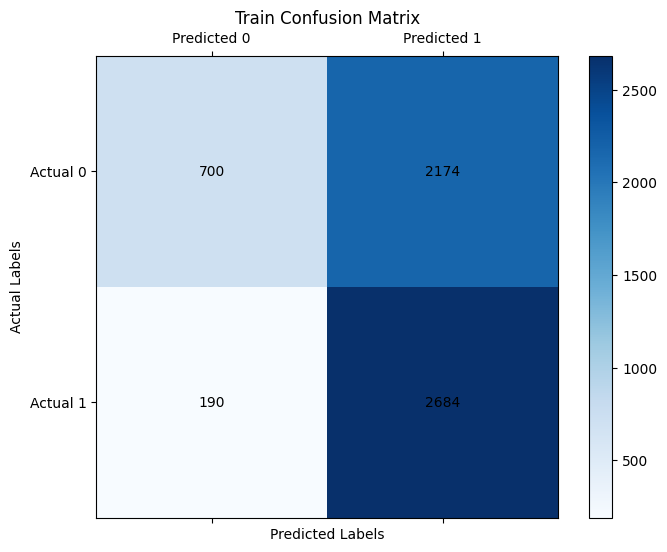

(array([[ 700, 2174],
        [ 190, 2684]]),
 0.5887265135699373,
 0.5524907369287773,
 0.9338900487125957)

In [324]:

calculate_metrics_and_plot(y_train, y_train_pred, title="Train Confusion Matrix", cmap="Blues")


Accuracy: 0.37
Precision: 0.19
Recall: 0.96


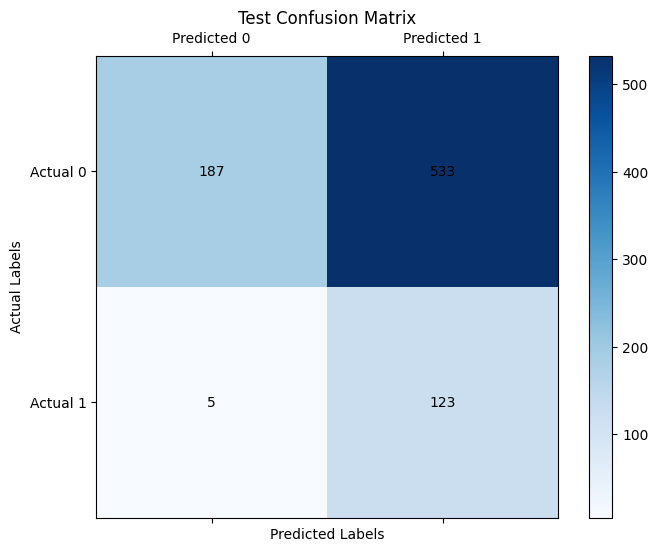

(array([[187, 533],
        [  5, 123]]),
 0.36556603773584906,
 0.1875,
 0.9609375)

In [325]:
calculate_metrics_and_plot(y_test, y_test_pred, title="Test Confusion Matrix", cmap="Blues")

## Observation on Results and importance of higher Recall for Medical Dataset

The model achieves a recall of 96%, which is critical for predicting TenYearCHD (risk of Coronary Heart Disease) since higher recall ensures the identification of most at-risk individuals. **In this healthcare context, minimizing false negatives (missed CHD cases) is far more important than reducing false positives**, as undiagnosed CHD can lead to severe health consequences or delayed medical intervention. Although the precision is less at 18% for test data, prioritizing recall means that the model errors on the side of caution by flagging more individuals who might require further medical evaluation. **This trade-off is acceptable in healthcare, where over-diagnosis (false positives) is preferable to under-diagnosis (false negatives)**.





